### Programming assessment 4

### Complex networks

### Jason Thomas

### Q1

This assignment will use two igraph functions to make use of the algorithms .

This report will:
- describe the basis for using algorithms
- once communities are found, check the conditions:
    - $ \bigcup_\limits{i=1}^k N(g_i) = N(G) $
    - $ \bigcap_\limits{i=1}^k N(g_i) = \emptyset $

In [41]:
library('igraph')

jazz <- as.matrix(read.table("jazz_edgelist-1.txt"));

# Duplicate edges was problematic for igraph, so we remove them.
uniqueJazz = unique(jazz);

jazzNet <- igraph::graph_from_edgelist(uniqueJazz,
                                       directed = FALSE);

vCount = igraph::vcount(jazzNet);

communitiesA = walktrap.community(jazzNet)
communitiesB = fastgreedy.community(jazzNet)

### Q1 Communities found using the Walktrap approach

The idea behind this algorithm is to take a walk. Encountering the same nodes on several walks suggests that nodes are connected. It's less likely that a walk will traverse communities, assuming that communities are highly connected.

The groups detected using this approach are shown below:

In [51]:
print(membership(communitiesA))

  [1]  4  5  1  1  1  2  5  4  4  5  5  5  1  5  4  4  4  1  5  5  6  4  4  4  1
 [26]  1  1  1  1  7  5  4  4  8  4  5  3  4  1  4  1  4  4  4  1  4  3  4  5  4
 [51]  1  5  5  5  5  5  5  4  5  4  5  4  4  4  4  4  5  4  5  5  5  5  1  5  1
 [76]  1  1  4  1  4  4  5  5  5  1  1  5  1  5  1  4  1  5  5  4  1  1  4  4  4
[101]  4  1  5  4  4  4  4  4  4  4  5  5  5  5  9  4  5  5  4 10  5  4  4  1  5
[126]  1  5  1  5  5  4  4  3  4  4  5  5  1  4  1  5  5  5  1  1  5  1  1  1  5
[151]  5  2  1  4  1  1  2  5  4  1  5  4  1  5 11  4  1  4  1  5  4  1  1  5  5
[176]  1  5  5  4  3  1  4  5  1  5  5  4  4  1  5  1  5  5  5  5  5  5  1


### Q1 Communities found using the FastGreedy approach

The idea behind this algorithm is to try and optimise the modularity score (maximise it). The documentation mentions this is based on a 2004 paper, and that paper mentions the Girvan-Newman algorithm is conceptually similar.

The groups detected using this approach are shown below:

In [53]:
print(membership(communitiesB))

  [1] 4 2 1 1 1 1 2 4 4 2 2 2 1 2 4 4 4 1 2 2 1 4 4 4 1 1 1 1 1 2 2 4 4 2 4 2 1
 [38] 4 1 4 1 4 4 4 1 4 1 4 2 4 1 2 2 2 2 2 2 4 3 4 2 4 4 4 4 4 2 4 2 2 2 2 1 4
 [75] 1 1 1 4 1 4 4 3 2 2 1 1 2 1 2 1 4 1 2 2 4 1 1 4 4 4 4 1 4 4 4 4 4 4 4 4 2
[112] 2 2 2 1 4 2 2 4 4 2 4 4 1 2 1 2 1 2 2 4 4 1 4 4 1 2 1 4 1 2 2 3 1 1 2 1 1
[149] 1 2 2 1 1 4 1 1 1 2 4 1 2 4 1 2 2 4 1 4 1 4 4 1 1 2 2 1 2 2 4 1 1 4 2 1 2
[186] 2 4 4 1 2 1 2 2 2 2 2 2 1


### Q1 Validation of criteria

The assessment states the algorithms should identify communities $ g_i \in G $ such that:
- $ \bigcup_\limits{i=1}^k N(g_i) = N(G) $
- $ \bigcap_\limits{i=1}^k N(g_i) = \emptyset $

Below, these are confirmed.

In [54]:
source('myFunctions.R')

unionIsFullNetwork(communitiesA, jazzNet);
intersectionIsEmpty(communitiesA);

unionIsFullNetwork(communitiesB, jazzNet);
intersectionIsEmpty(communitiesB);


[1] TRUE

[1] TRUE

[1] TRUE

[1] TRUE

### Q2 Visualisation of results

The best I can get using standard R functions are these plots, although they're not very informative.

Unfortunately I have not yet found a nice way to create sufficient space between the communities in the networks.


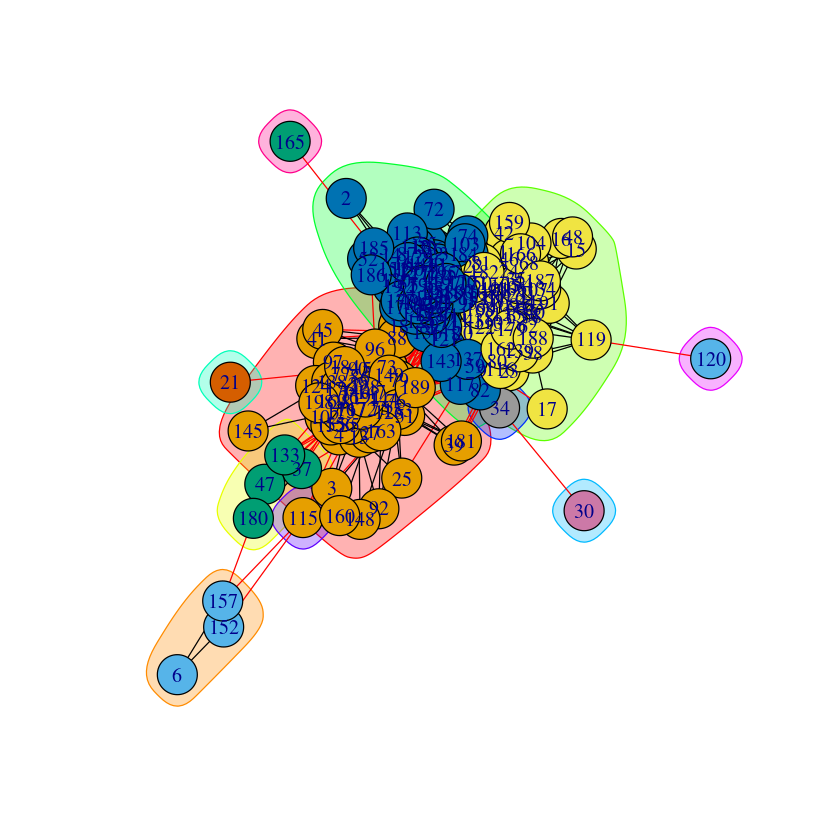

In [55]:
plot(communitiesA, jazzNet)

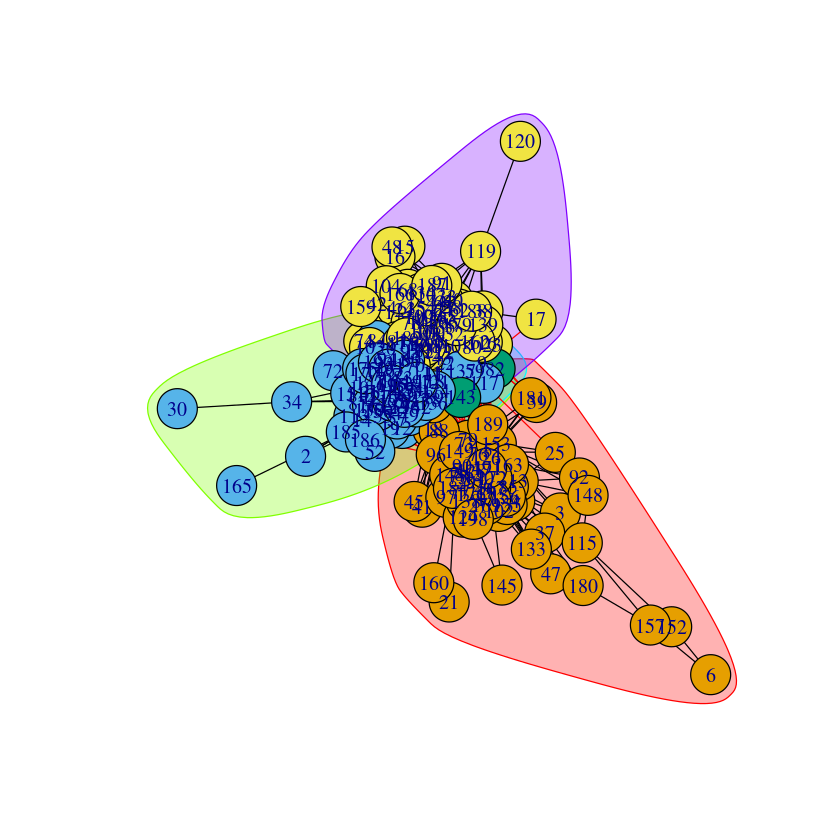

In [56]:
plot(communitiesB, jazzNet)

### Q2 - modularity


In [57]:
QA = modularity(jazzNet,
                membership(communitiesA),
                directed=FALSE)
QA

[1] 0.4384215

In [58]:
QB = modularity(jazzNet,
                membership(communitiesB),
                directed=FALSE)
QB

[1] 0.4389078

This result for modularity, above, is surprising because the scores are so close. I had expected that the second result (the greedy algorithm that directly optimises modularity) would get the highest modularity score. It does get the higher score but only slightly.

I am unsure which result is the best. 

There's a case to say that the Walktrap algorithm produces the best result, with its slightly lower modularity. If a musician has collaborated with only one other, from a different community, then maybe they a community by themselves. This is what we might see be composing the network with k-cliques. I can not think of a good reason to say that the existence of singleton communities is invalid so this is promising.

Conceptually, a reduction in modularity does not ensure better results; we can see this by looking at musicians in genres of music. Those musicians might still collaborate with musicians from other genres. By maximising modularity, we reduce the number of edges that have an end in two different communities so this does not seem to make sense in the case of jazz musicians.

In summary, I think the algorithm that produces communities with a slightly lower modularity is the better choice.

.

### Q3

I had a look at available packages but it seemed that the best way to do this was to write the algorithm.

K-clique percolation algorithm:
- Step 1: find k-clique in network
- Step 2: connect another clique that shares k-1 nodes
- Step 3: if halt condition not reached, repeat

Implicitly, connecting cliques means forming a community.

The above seems equivalent to the process below, but I find this easier to think about.

Let $ k=3 $

- Step 1: assign all k-cliques to singleton sets (communities of a single 3-clique)
- Step 2: take a singleton community (a 3-clique)
- Step 3: find a clique with 2 nodes in common 
- Step 4: merge communities
- Step 5: repeat (2-4) until all cliques are connected. The ones that are not connected to other cliques will be singleton 3-cliques

For performance reasons, let the set of communities be a `pairlist` object (this is a linked-list in R). This is because we will arbitrarily remove elements of the linked-list. To do this with an array-like structure is relatively inefficient (deleting one element means shifting everything left by 1). 

The elements of the linked-list are communities (initially just 3-cliques). These communities are individually vectors of node indices.

There is a small example in the appendix to reveal how the algorithm works.

.

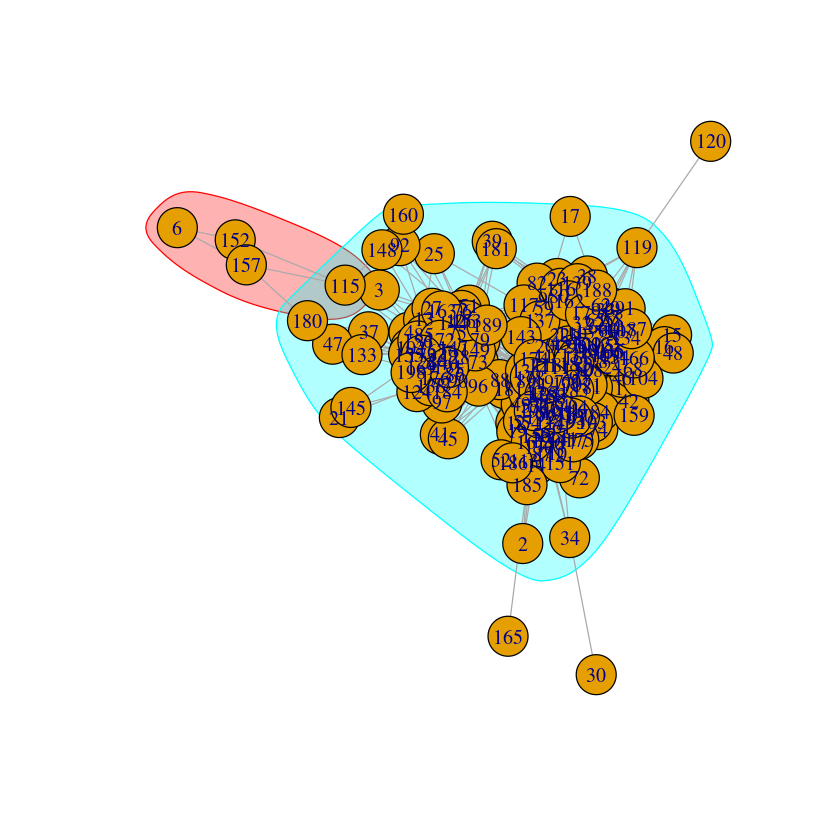

In [59]:
jazzCommunities = kCliquePercolation(jazzNet, 3);
plot(jazzNet, mark.groups=jazzCommunities);

How many communities are there after k-clique percolation?

In [16]:
length(jazzCommunities)

[1] 2

There are just two communities. Their sizes are:

In [20]:
length(jazzCommunities[[1]])

length(jazzCommunities[[2]])

[1] 4

[1] 189

Which musician connects the two communities?

In [33]:
overlapNode = findOverlaps(jazzCommunities);
print(overlapNode)

[1] 115


Is this an important node, from looking at its degree distribution?

In [36]:
overlapNodeDegree = degree(jazzNet)[overlapNode];
overlapNodeDegree

[1] 7

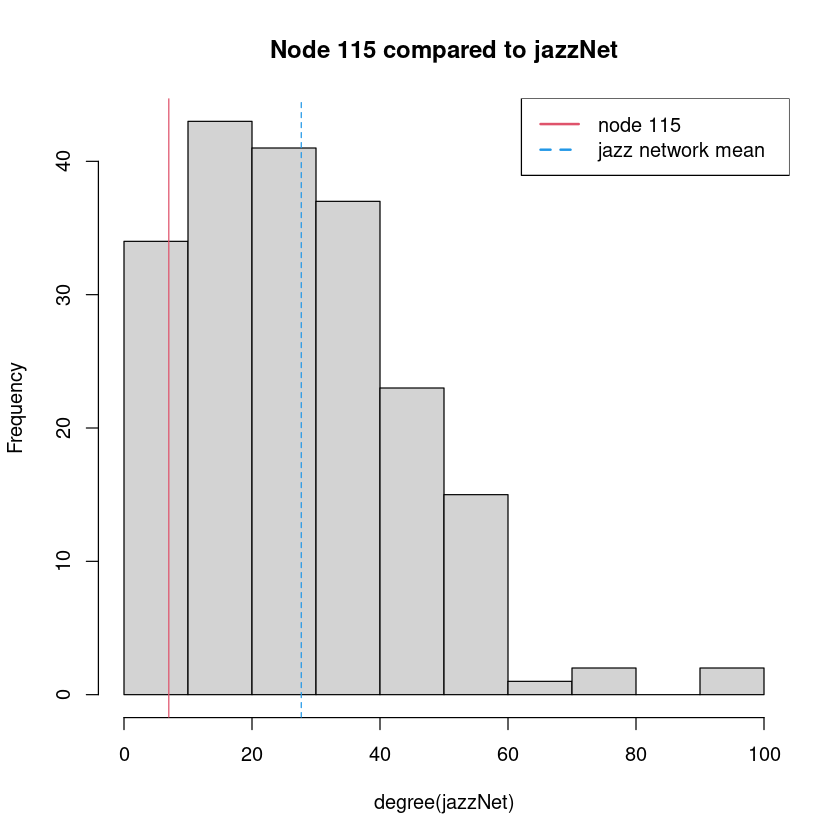

In [40]:
hist(degree(jazzNet),
     main="Node 115 compared to jazzNet");
abline(v=overlapNodeDegree, lty=1, col=2);
abline(v=mean(degree(jazzNet)), lty=2, col=4);
legend(x = "topright",
    legend = c("node 115", "jazz network mean"),
    lty = c(1, 2),
    col = c(2, 4),
    lwd = 2);



To determine which musician (or node) is most important, you might discount any node that is below the mean degree for the network. But if you did that you would count node 115 as being not important. However node 115 connects two communities. A node that connects two communities seems to be important, even if it has a low degree.

Generally, I propose nodes that connect communities (when the k-clique percolation algorithm is applied) are important, if only for their role in connecting communities. Those nodes might also be important in terms of a centrality score (for example betweenness or degree).

To answer the question: "do you think allowing nodes to belong to more than one community gives greater insight?"

Yes, I think it makes sense and it is analogous to a person who has multiple friendship networks. In a large city it is possible to belong to multiple friendship networks, where only yourself is common to both networks. In a friendship network, generally, there are cliques; not everyone in a friendship network knows everyone else, but, visit any party and you will likely find yourself talking to two people at the same time. So it's sensible to think of friendship groups being composed of 3-cliques. It is also feasible that you might find yourself as belonging to several groups simultaneously where you are the only person in both groups. Then it seems that the 3-clique percolation algorithm is a valid and useful way to find communities in social networks.

.

## Appendix

### Simple example for documenting the k-clique percolation algorithm

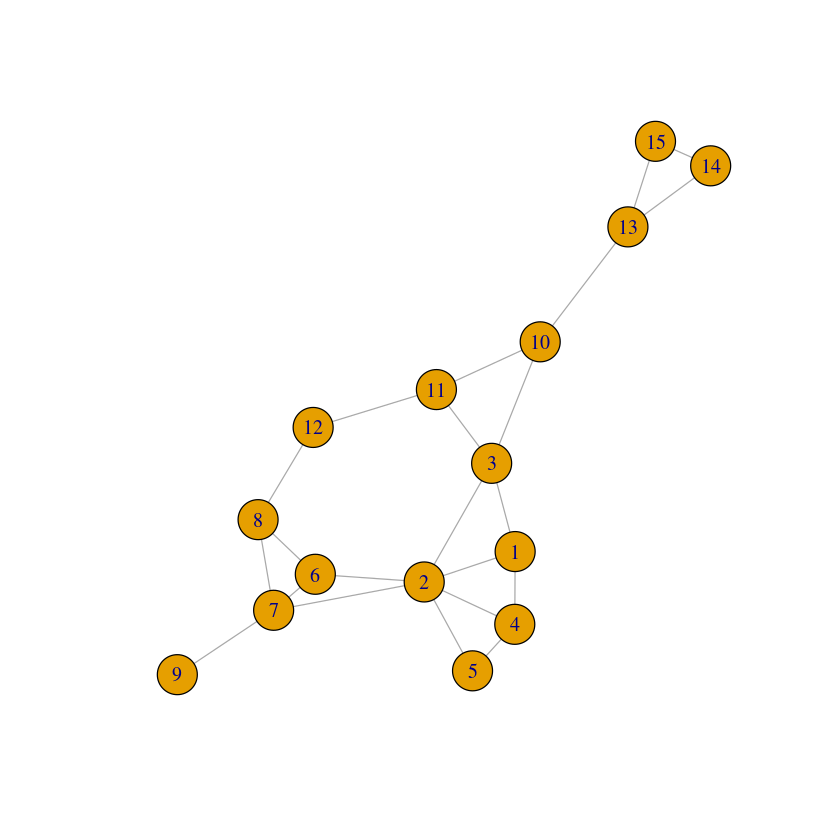

In [43]:
# Simple network

edgeList = matrix(c(1,1,2,2,1,4,2,7,6,6,9,8,8,12,12,11,11,10,13,14,15,15,
                    3,2,3,4,4,5,5,2,2,7,7,6,7,11, 8,10, 3, 3,10,13,13,14),
                    ncol = 2);

testG = graph_from_edgelist(el = edgeList,
                            directed=FALSE);

plot(testG)


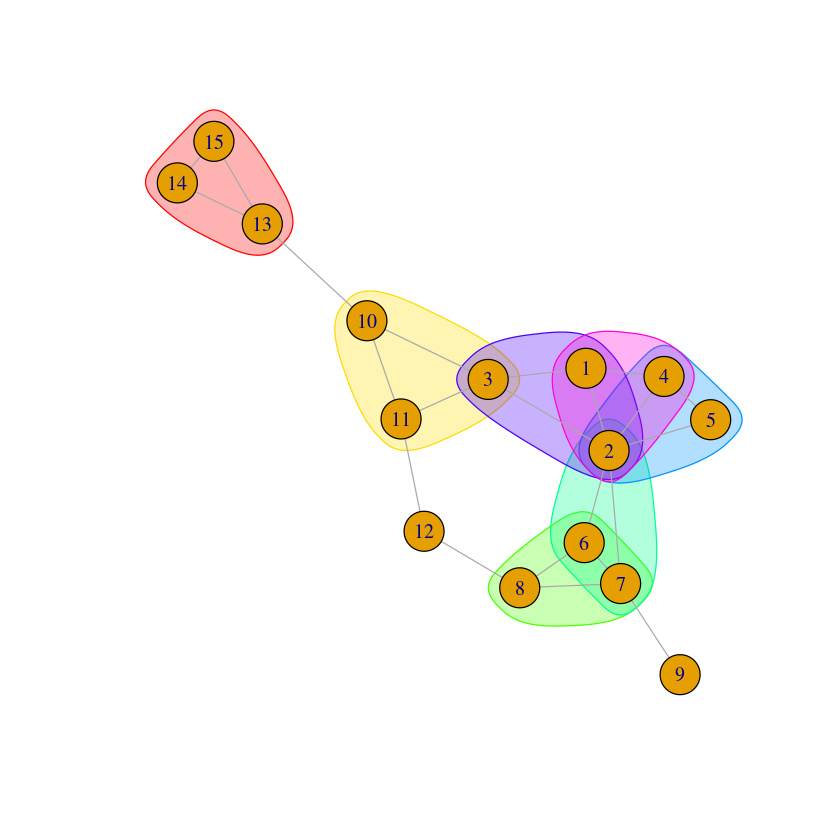

In [44]:
# 3-cliques identified

communities = as.pairlist(cliques(testG, min=3, max=3));

plot(testG, mark.groups=communities);

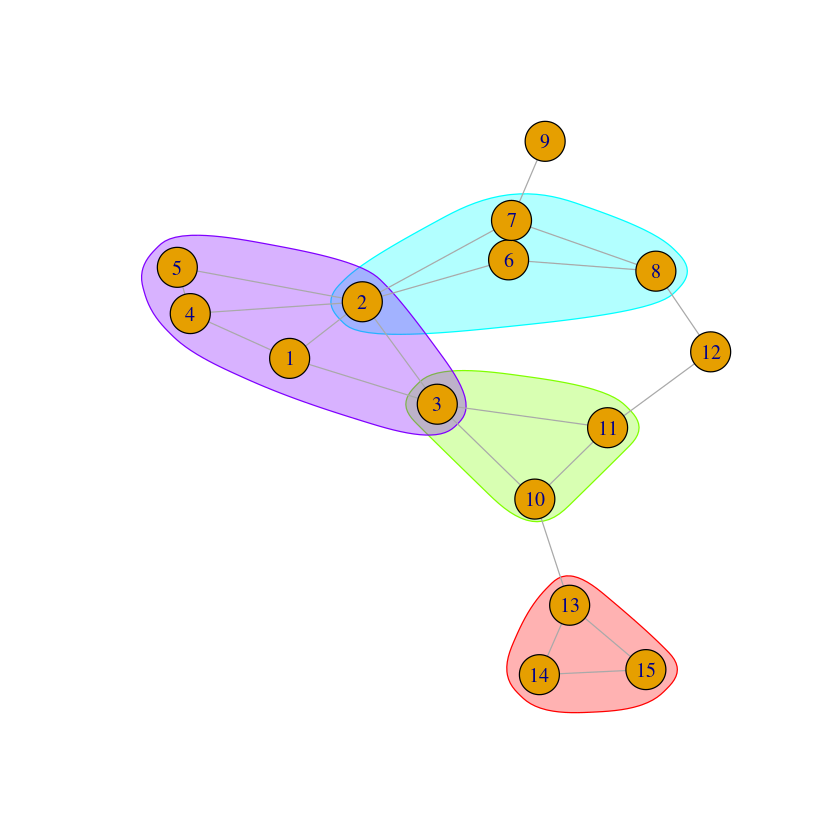

In [45]:
# k-clique percolation algorithm

communities = kCliquePercolation(testG, 3);

plot(testG, mark.groups = communities)

In [46]:
# These are the nodes that belong to more than one community

print(findOverlaps(communities));

[1] 3 2


### My code

In [ ]:
unionIsFullNetwork = function(communities, fullNet) {
    cummulativeUnion = communities[[1]];
    for (i in 2:length(communities)) {
        cummulativeUnion = union(cummulativeUnion, communities[[i]])
    }
    # Union of communities should be same as graph. Same number of nodes 
    # confirms this
    (length(cummulativeUnion) == vcount(fullNet))
}

intersectionIsEmpty = function(communities) {
    cummulativeIntersection = communities[[1]];
    for (i in 2:length(communities)) {
        cummulativeIntersection = intersect(cummulativeIntersection, 
                                            communities[[i]])
    }
    # Intersection of communities should be the empty set
    (length(cummulativeIntersection) == 0)
}

sharesKMinus1Nodes = function(communityToMerge, 
                              communityToCompare, 
                              kMinus1) {
    (length(intersect(communityToMerge, 
                      communityToCompare)) >= kMinus1)
}

kCliquePercolation = function(net, k) {
    # If any community shares k-1 nodes with any other, then those 
    # communities can be merged To start with, all communities are 
    # single k-cliques

    # Since we're using a linked list object, it would be wise to use a 
    # while loop and pop elements from the top of the list as needed. 
    # If the current clique under-iteration cannot be merged to another 
    # then we leave it as-is but increase the cursor + 1.
    # In this case the community under-iteration

    # This process will necessarily drop any node that doesn't belong to a 
    # k-clique
    
    # Make each k-clique a community
    
    communities <- as.pairlist(cliques(net, min=k, max=k));

    cursor = 1; # Place in the list
    merged = FALSE
    while (cursor < length(communities)) {
        communityToMerge = communities[[cursor]];
        for (j in (cursor+1):length(communities)) {
            communityToCompare = communities[[j]];
            if (sharesKMinus1Nodes(communityToMerge,
                                   communityToCompare, 2)) {
                communities[[j]] = union(communityToMerge,
                                         communityToCompare);
                communities <- communities[-cursor];
                merged <- TRUE;
                break;
            }
        }
        if (!merged) {
            cursor <- cursor + 1;
        } else {
            merged <- FALSE;
        }
    }    
    (communities)
}

findOverlaps = function(communities) {
    overlaps = c(); # these elements appear in more than one community
    
    for (i in 1:(length(communities)-1)) {
        for (j in (i+1):length(communities)) {
            overlap = as.vector(intersect(communities[[i]],
                                          communities[[j]]));
            overlaps = c(overlaps, overlap);
         }
    }
    (overlaps);
}
